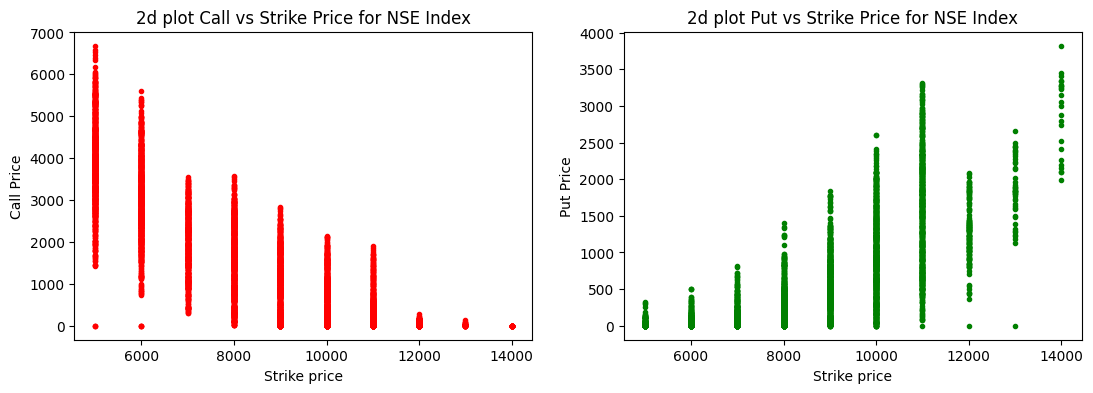

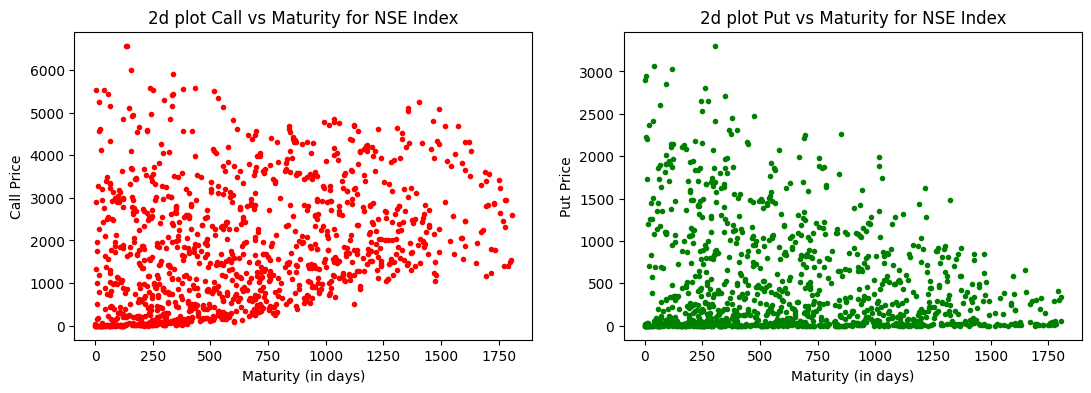

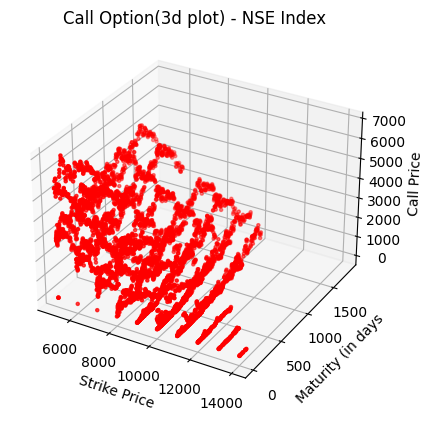

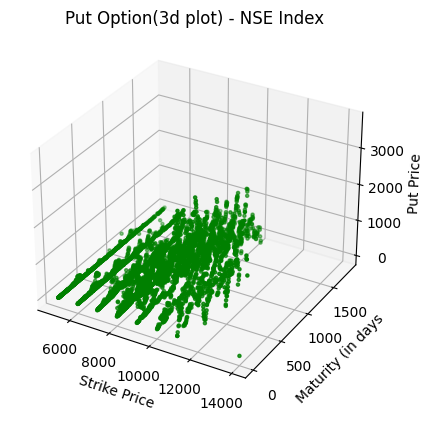

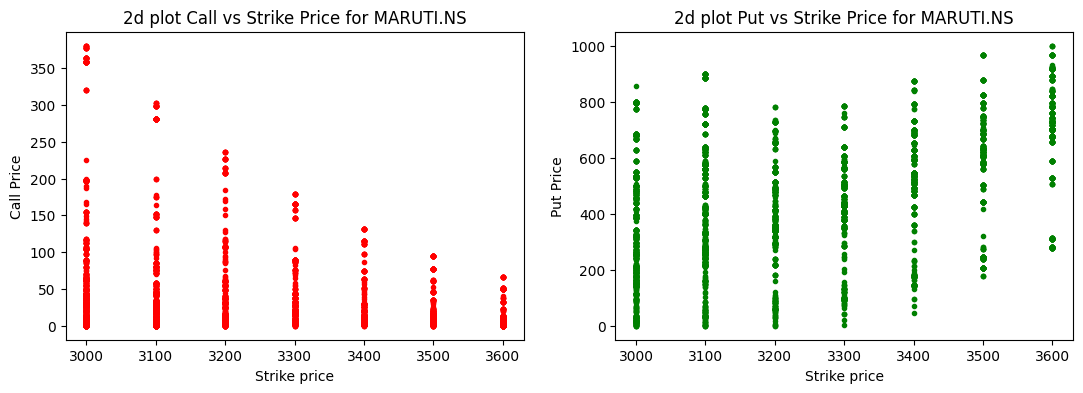

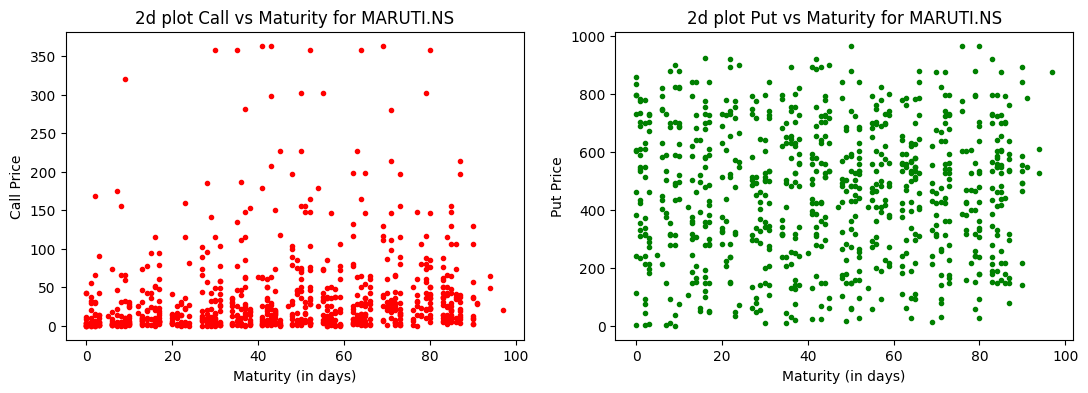

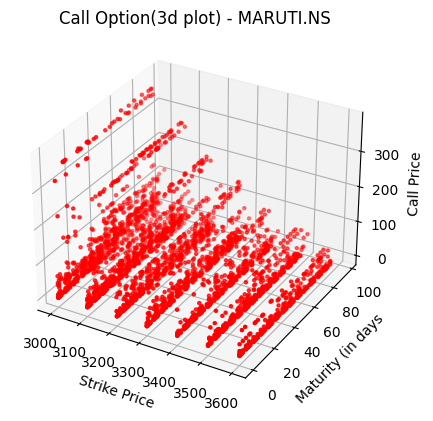

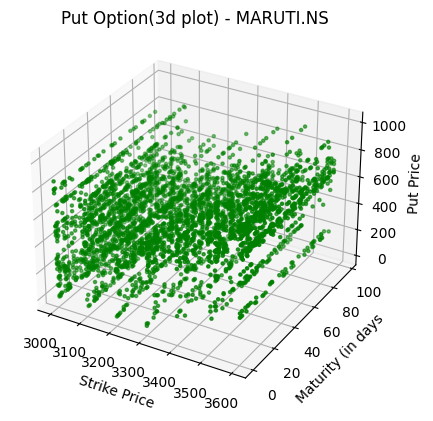

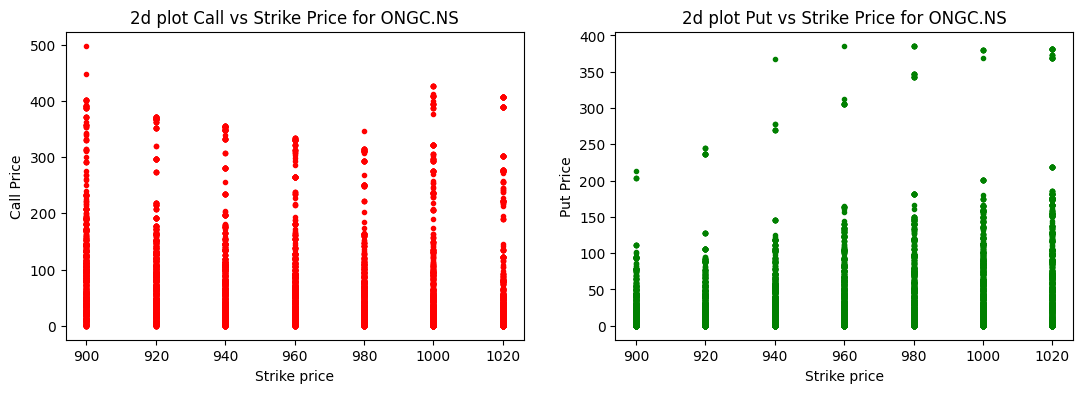

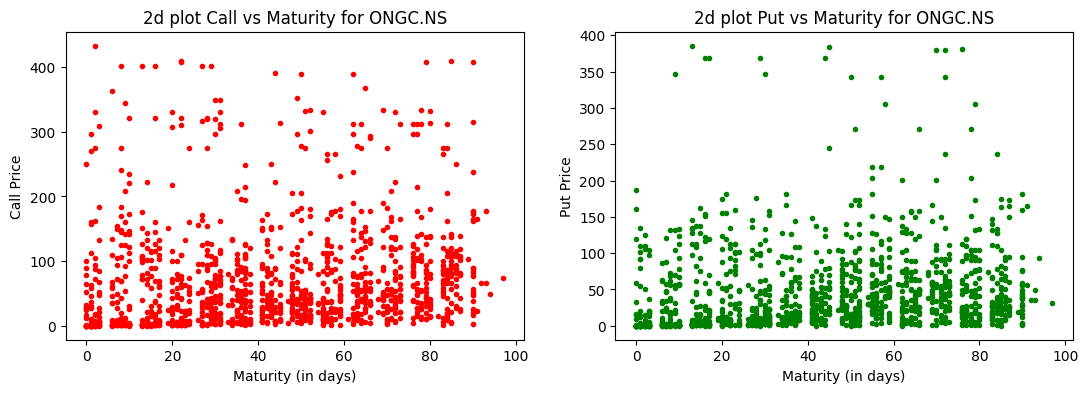

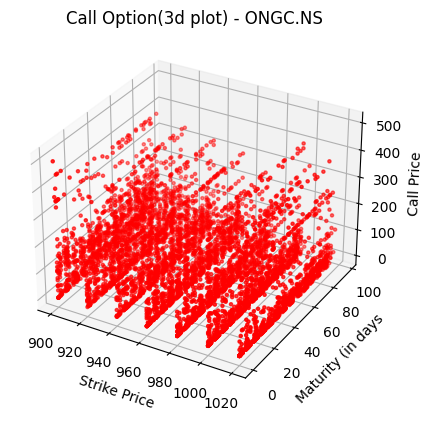

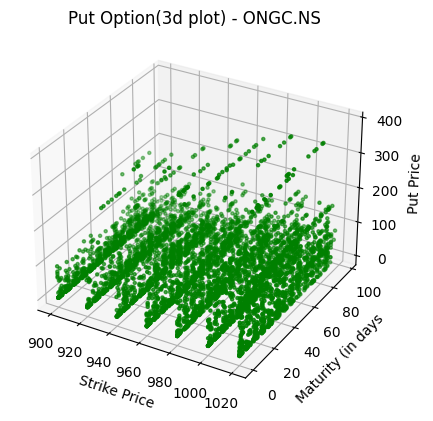

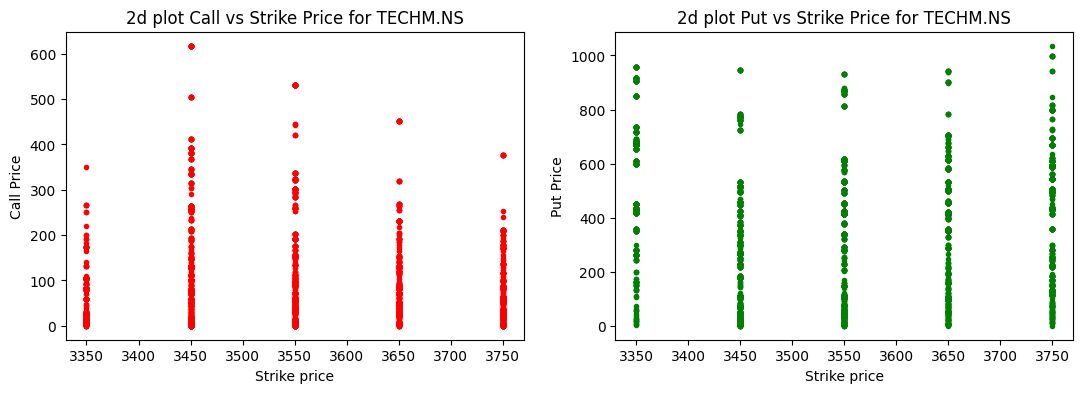

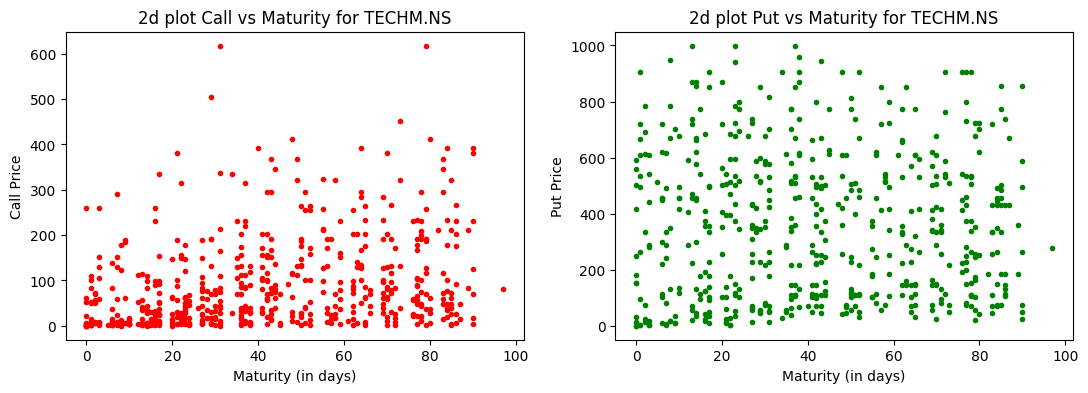

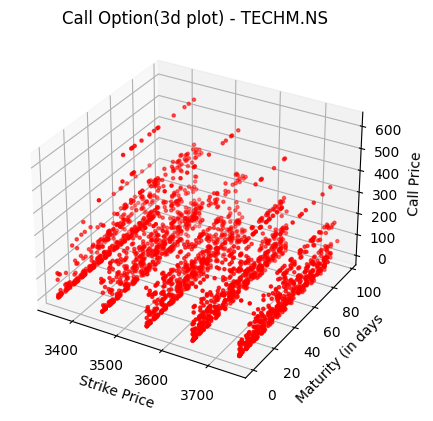

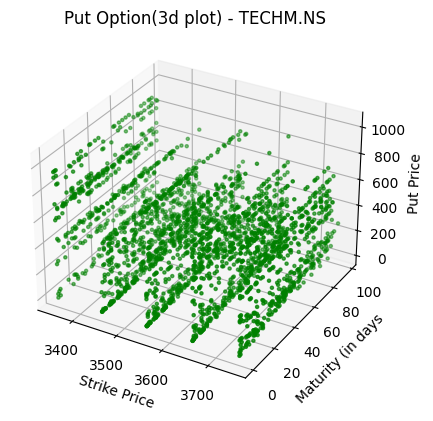

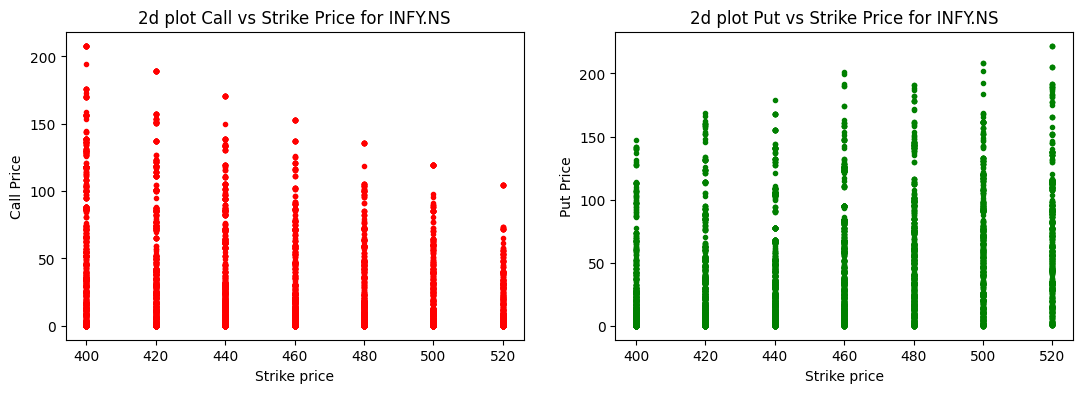

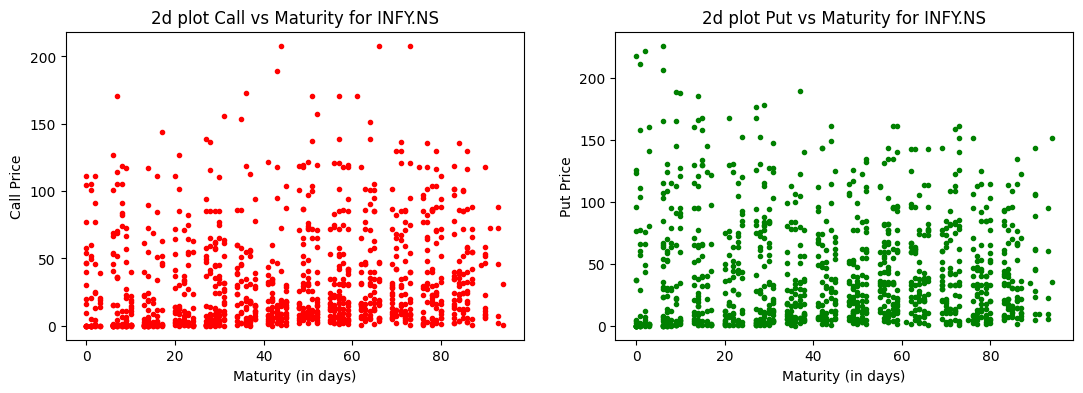

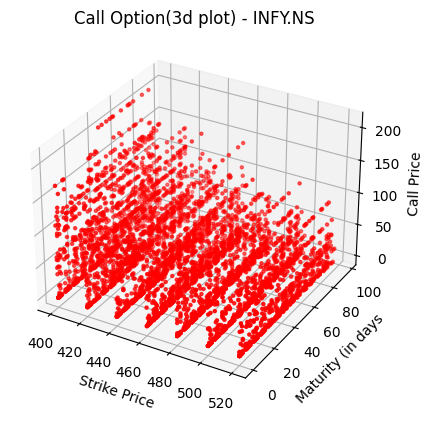

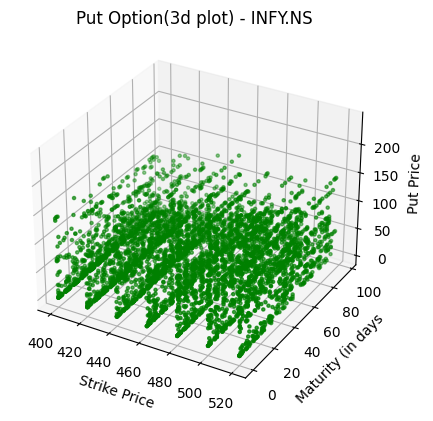

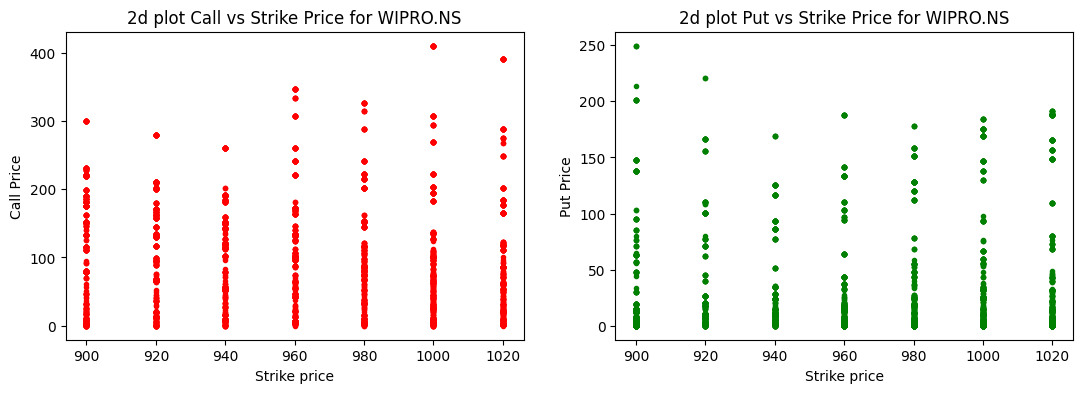

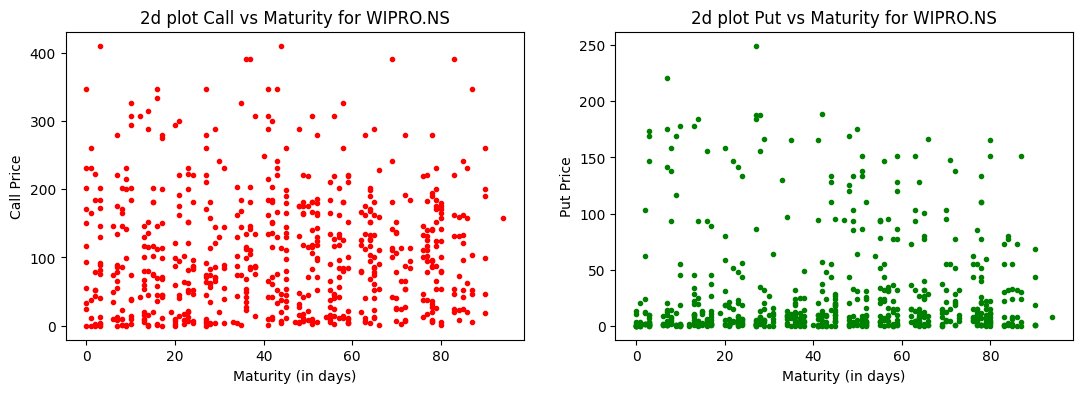

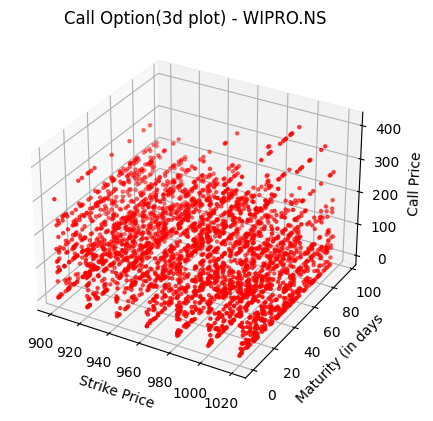

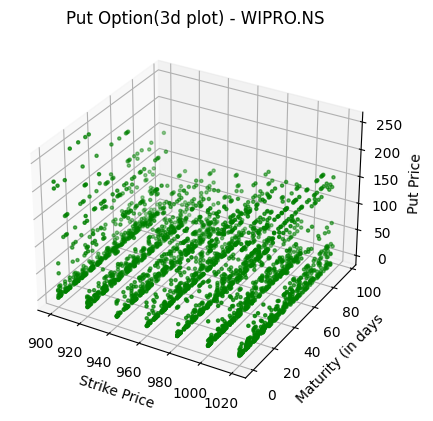

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
from datetime import datetime

# if using a Jupyter notebook, kindly uncomment the following line:
# %matplotlib inline


def plot_3D(filename, opt_type):
    mpl.rcParams.update(mpl.rcParamsDefault)
    df = pd.read_csv(filename)

    strike, maturity, call, put = [], [], [], []
    for index, row in df.iterrows():
        num = random.random()
        if num <= 0.25:
            strike.append(row['Strike Price'])
            d1 = datetime.strptime(row['Expiry'],  '%d-%b-%y')
            d2 = datetime.strptime(row['Date'],  '%d-%m-%Y')
            delta = d1 - d2
            maturity.append(delta.days)
            call.append(row['Call Price'])
            put.append(row['Put Price'])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(strike, maturity, call, marker = '.',color='red')
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Maturity (in days')
    ax.set_zlabel('Call Price')
    ax.set_title('Call Option(3d plot) - {}'.format(opt_type))
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(strike, maturity, put, marker = '.',color='green')
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Maturity (in days')
    ax.set_zlabel('Put Price')
    ax.set_title('Put Option(3d plot) - {}'.format(opt_type))
    plt.show()


def plot_2D(filename, opt_type):
    plt.rcParams["figure.figsize"] = (13, 4)
    df = pd.read_csv(filename)

    # Option price vs Strike price
    x, call, put = [], [], []
    for index, row in df.iterrows():
        num = random.random()
        if num <= 0.25:
            x.append(row['Strike Price'])
            call.append(row['Call Price'])
            put.append(row['Put Price'])

    plt.subplot(1, 2, 1)
    plt.scatter(x, call, marker = '.',color='red')
    plt.xlabel('Strike price')
    plt.ylabel('Call Price')
    plt.title('2d plot Call vs Strike Price for {}'.format(opt_type))
    
    plt.subplot(1, 2, 2)
    plt.scatter(x, put, marker = '.',color='green')
    plt.xlabel('Strike price')
    plt.ylabel('Put Price')
    plt.title('2d plot Put vs Strike Price for {}'.format(opt_type))
    plt.show()

    # Option price vs Maturity
    x, call, put = [], [], []
    random.seed(53)
    for index, row in df.iterrows():
        num = random.random()
        if num <= 0.05:
            d1 = datetime.strptime(row['Expiry'],  '%d-%b-%y')
            d2 = datetime.strptime(row['Date'],  '%d-%m-%Y')
            delta = d1 - d2
            x.append(delta.days)
            call.append(row['Call Price'])
            put.append(row['Put Price'])

    plt.subplot(1, 2, 1)
    plt.scatter(x, call, marker = '.',color='red')
    plt.xlabel('Maturity (in days)')
    plt.ylabel('Call Price')
    plt.title('2d plot Call vs Maturity for {}'.format(opt_type))
    
    plt.subplot(1, 2, 2)
    plt.scatter(x, put, marker = '.',color='green')
    plt.xlabel('Maturity (in days)')
    plt.ylabel('Put Price')
    plt.title('2d plot Put vs Maturity for {}'.format(opt_type))
    plt.show()





def main():
  files = ['NIFTYoptiondata', 'stockoptiondata_MARUTI', 'stockoptiondata_ONGC', 'stockoptiondata_TECHM', 'stockoptiondata_INFY', 'stockoptiondata_WIPRO']
  opt_type = ['NSE Index', 'MARUTI.NS', 'ONGC.NS', 'TECHM.NS', 'INFY.NS', 'WIPRO.NS']

  for idx in range(len(files)):
    files[idx] = './' + files[idx] + '.csv'
    plot_2D(files[idx], opt_type[idx])
    plot_3D(files[idx], opt_type[idx])


if __name__=="__main__":
  main()